# Import das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Hiperparâmetros


In [10]:
NODE_DIMENTION = 4
NODE_COUNT = 3
STEPS = 50000

ACTIVATION_DISTANCE = 0.3
INITIAL_SIGMA = 0.01
INITIAL_ETA = 0.3
T2 = 1000

# Carregamento e preprocessamento

In [3]:
numerical_classes = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
dataset = pd.read_csv('iris.csv')

for colname in numerical_classes:
  dataset[colname] = (dataset[colname] - dataset[colname].min()) / (dataset[colname].max() - dataset[colname].min())

In [ ]:
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [7]:
numpy_dataset = dataset.drop(['Species'], axis=1).to_numpy()

# Implementação do SOM

In [8]:
class SOM:
  def __init__(self, node_count=3, dimensions=4, t2=20000, initial_sigma=0.01,
               initial_eta=0.1, min_eta=0.01):
    self.nodes = np.random.random_sample(size=(node_count, dimensions))
    self.initial_sigma = initial_sigma
    self.initial_eta = initial_eta
    self.node_count = node_count
    self.min_eta = min_eta
    self.t2 = t2
    self.t1 = self.t2 / np.log(self.initial_sigma)

  def distances_from(self, point):
    return ((self.nodes - point) ** 2).sum(axis=-1)

  def predict(self, point):
    distances = np.abs((self.nodes - point).sum(axis=1))
    return distances.argmin()

  def sigma(self, n):
    return self.initial_sigma * np.exp(n / self.t1)

  def eta(self, n):
    return max(self.initial_eta * np.exp(n / self.t2), self.min_eta)

  def fit(self, dataset, steps=1):
    for step in range(steps):
      sample = dataset[step % len(dataset)]
      winner = self.predict(sample)
      distance_from_winner = self.distances_from(winner)
      for i in range(self.node_count):
        if distance_from_winner[i] > ACTIVATION_DISTANCE:
          continue
        
        topological_neighborhood = np.exp(-distance_from_winner[i]
                                          / (2 * self.sigma(step) ** 2))
        sample_distance = sample - self.nodes[i]
        self.nodes[i] += self.eta(step) * topological_neighborhood * (sample - self.nodes[i])
                                                 

# Execução do SOM

In [11]:
som_model = SOM(node_count=NODE_COUNT, dimensions=NODE_DIMENTION, t2=T2,
                initial_sigma=INITIAL_SIGMA, initial_eta=INITIAL_ETA)
som_model.fit(numpy_dataset, steps=STEPS)

In [12]:
som_model.nodes

array([[0.34065241, 0.15403673, 0.89830146, 0.61885123],
       [0.68161809, 0.38971824, 0.22970577, 0.20141274],
       [0.15070444, 0.68936988, 0.93091953, 0.44997217]])

# Avaliação dos resultados

In [13]:
predictions = list()
for sample in numpy_dataset:
  group = som_model.predict(sample)
  predictions.append(group)

predicted_dataset = dataset.copy()
predicted_dataset['Species'] = predictions

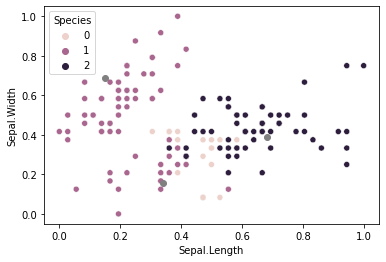

In [14]:
sns.scatterplot(data=predicted_dataset, x="Sepal.Length", y="Sepal.Width", hue="Species")
for node in som_model.nodes:
  plt.scatter(x=node[0], y=node[1], color='gray')

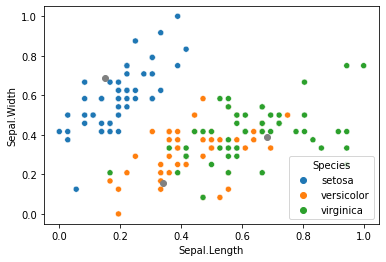

In [15]:
sns.scatterplot(data=dataset, x="Sepal.Length", y="Sepal.Width", hue="Species")
for node in som_model.nodes:
  plt.scatter(x=node[0], y=node[1], color='gray')

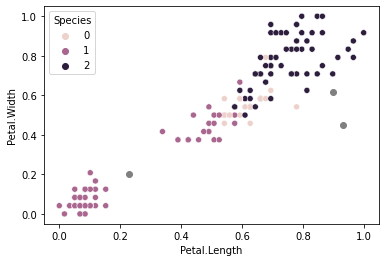

In [16]:
sns.scatterplot(data=predicted_dataset, x="Petal.Length", y="Petal.Width", hue="Species")
for node in som_model.nodes:
  plt.scatter(x=node[2], y=node[3], color='gray')

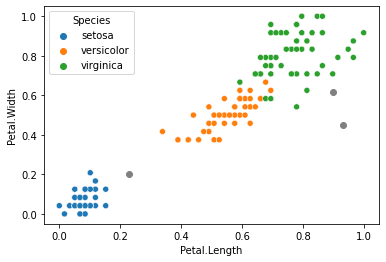

In [17]:
sns.scatterplot(data=dataset, x="Petal.Length", y="Petal.Width", hue="Species")
for node in som_model.nodes:
  plt.scatter(x=node[2], y=node[3], color='gray')